#### tensorflow ver.2.0

In [1]:
import tensorflow as tf

#### Constant

In [2]:
a = tf.constant(1.0, name='a')
b = tf.constant(2.0, name='b')
c = tf.constant([ [1.0, 2.0], [3.0, 4.0]])

In [3]:
print(a)
print(a+b)
print(c+1)

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(3.0, shape=(), dtype=float32)
tf.Tensor(
[[2. 3.]
 [4. 5.]], shape=(2, 2), dtype=float32)


In [4]:
tensor_a = tf.constant(100)
tensor_a.numpy()

100

In [5]:
print(a.numpy())
print(c.numpy())

1.0
[[1. 2.]
 [3. 4.]]


In [6]:
print(type(c))
print(type(c.numpy()))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>


In [7]:
tensor_a = tf.constant(2)
tensor_b = tf.constant(3)

In [8]:
tensor_c = tf.add(tensor_a, tensor_b)
tensor_d = tensor_a + tensor_b

print("Tensor c type: ", type(tensor_c), " value: ", tensor_c)
print("Tensor d type: ", type(tensor_d), " value: ", tensor_d)

Tensor c type:  <class 'tensorflow.python.framework.ops.EagerTensor'>  value:  tf.Tensor(5, shape=(), dtype=int32)
Tensor d type:  <class 'tensorflow.python.framework.ops.EagerTensor'>  value:  tf.Tensor(5, shape=(), dtype=int32)


In [9]:
tensor_a = tf.constant([ [1, 2], [1, 2] ])
tensor_b = tf.constant([ [3, 4], [3, 4] ])

print(tensor_a * tensor_b)

tf.Tensor(
[[3 8]
 [3 8]], shape=(2, 2), dtype=int32)


In [10]:
print(tf.matmul(tensor_a, tensor_b)) # 행렬 곱

tf.Tensor(
[[ 9 12]
 [ 9 12]], shape=(2, 2), dtype=int32)


#### Variable

In [11]:
# Variables
W = tf.Variable(tf.ones(shape=(2,2)), name="W") 
b = tf.Variable(tf.ones([2,]), name="b")

In [12]:
print(W)
print(b)

<tf.Variable 'W:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>
<tf.Variable 'b:0' shape=(2,) dtype=float32, numpy=array([1., 1.], dtype=float32)>


#### Placeholder(ver 1.0) -> Function(ver 2.0)

In [13]:
@tf.function
def model(x):
    return tf.matmul(x,W)+b

In [14]:
x = tf.constant([[1,2]], dtype="float32")
print(x)

tf.Tensor([[1. 2.]], shape=(1, 2), dtype=float32)


In [15]:
print(model(x))

tf.Tensor([[4. 4.]], shape=(1, 2), dtype=float32)


#### Keras

- model = Sequential() 로 model 정의
- model.add(Flatten(input_shape=(1,))) 로 input layer 정의
- model.add(Dense(#node_개수, activation='sigmoid 등')) 으로 hidden layer / output layer 정의
- model.add(Dense(#node_개수, activation='sigmoid 등', input_shape=(1,))) 로 첫 번째 계층에 바로 Dense를 쓰는 게 일반적
- model.compile(optimizer, loss, metrics) 정의
- model.fit( x_train, t_train, epochs, batch_size(한번에 입력으로 주는 data), validation_split(train_data의 몇 %를 validation data로 사용할 건지) )
- model.evaluate(x_test, t_test, epochs)
- model.predict(x_input_data)

#### Linear regression

In [16]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam

In [17]:
x_train_data = np.array([
    [1,2,0],
    [5,4,3],
    [1,2,-1],
    [3,1,0],
    [2,4,2],
    [4,1,2],
    [-1,3,2],
    [4,3,3,],
    [0,2,6],
    [2,2,1],
    [1,-2,-2],
    [0,1,3],
    [1,1,3],
    [0,1,4],
    [2,3,3]
])

t_train_data = np.array([
    -4,
    4,
    -6,
    3,
    -4,
    9,
    -7,
    5,
    6,
    0,
    4,
    3,
    5,
    5,
    1
])

In [18]:
model = Sequential() # Input / Output layer model

In [19]:
model.add(Flatten(input_shape=(3,), name="input_layer"))

In [20]:
model.add(Dense(1, activation="linear", name="output_layer")) # Linear regression model 이므로 

In [21]:
model.compile(optimizer=SGD(learning_rate=1e-2), loss="mse")

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 3)                 0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [23]:
hist = model.fit(x_train_data, t_train_data, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 159ms/step - loss: 37.2423
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 26.0424
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 20.0695
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 16.7084
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 14.6654
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 13.2994
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 12.2917
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 11.4828
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 10.7922
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1785
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 9.6197
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 9.1036
Epoch 13/100
1/1 [==============================]

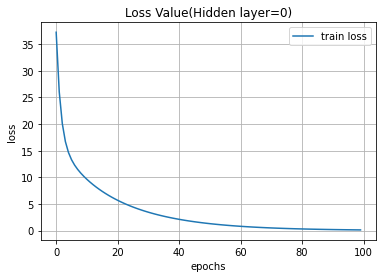

In [24]:
import matplotlib.pyplot as plt

plt.title('Loss Value(Hidden layer=0)')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.legend(loc='best')

plt.show()

In [25]:
x_test_data = np.array([
    [5,5,0],
    [1,3,0],
    [4,-2,-5],
    [7,8,3]
])

t_test_data = np.array([ [2*data[0] - 3*data[1] + 2*data[2]] for data in x_test_data])

predict = model.predict(x_test_data)

In [26]:
print("Predict: ", predict)
print("\nAnswer: ", t_test_data)

Predict:  [[-4.462971 ]
 [-6.347124 ]
 [ 3.69951  ]
 [-3.4491267]]

Answer:  [[-5]
 [-7]
 [ 4]
 [-4]]


In [27]:
print(model.weights) # model W, b

[<tf.Variable 'output_layer/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.8531117],
       [-2.764147 ],
       [ 1.8666872]], dtype=float32)>, <tf.Variable 'output_layer/bias:0' shape=(1,) dtype=float32, numpy=array([0.09220564], dtype=float32)>]


In [28]:
model2 = Sequential() # Input, Hidden 1(3 nodes), Output layer model

model2.add(Dense(3, activation="linear", input_shape=(3,), name="in_and_hidden"))

In [29]:
model2.add(Dense(1, activation="linear", name="output"))

In [30]:
model2.compile(optimizer=SGD(1e-2), loss="mse")

In [31]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
in_and_hidden (Dense)        (None, 3)                 12        
_________________________________________________________________
output (Dense)               (None, 1)                 4         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [32]:
hist2 = model2.fit(x_train_data, t_train_data, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 260ms/step - loss: 43.1601
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 29.5842
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 25.8239
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 23.5654
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 21.8874
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 20.4734
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 19.1692
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 17.8899
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 16.5883
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 15.2417
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 13.8452
Epoch 12/100
1/1 [==============================] - 0s 2ms/step - loss: 12.4068
Epoch 13/100
1/1 [=============================

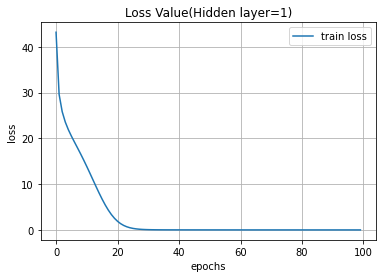

In [33]:
import matplotlib.pyplot as plt

plt.title('Loss Value(Hidden layer=1)')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist2.history['loss'], label='train loss')
plt.legend(loc='best')

plt.show()

#### Logistic Regression

In [34]:
train_data = np.loadtxt('diabetes.csv', delimiter=',', dtype="float32")

In [35]:
x_train_data = train_data[:,:-1]
t_train_data = train_data[:,[-1]]

print(x_train_data.shape, t_train_data.shape)

(759, 8) (759, 1)


In [36]:
# DNN (Hidden layer 2개, 각 3 nodes)
model = Sequential([
    Dense(100, activation="sigmoid", input_shape=(x_train_data.shape[1],), name="Hidden_1"),
    Dense(100, activation="sigmoid", name="Hidden_2"),
    Dense(t_train_data.shape[1], activation="sigmoid", name="Output"),
])

In [37]:
model.compile(optimizer=SGD(0.1), loss="binary_crossentropy", metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_1 (Dense)             (None, 100)               900       
_________________________________________________________________
Hidden_2 (Dense)             (None, 100)               10100     
_________________________________________________________________
Output (Dense)               (None, 1)                 101       
Total params: 11,101
Trainable params: 11,101
Non-trainable params: 0
_________________________________________________________________


In [39]:
hist = model.fit(x_train_data, t_train_data, validation_split=0.2, epochs=500)

Epoch 1/500
19/19 [==============================] - 0s 8ms/step - loss: 0.6534 - accuracy: 0.6557 - val_loss: 0.6516 - val_accuracy: 0.6447
Epoch 2/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6489 - accuracy: 0.6557 - val_loss: 0.6745 - val_accuracy: 0.6447
Epoch 3/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.6557 - val_loss: 0.6510 - val_accuracy: 0.6447
Epoch 4/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.6557 - val_loss: 0.6700 - val_accuracy: 0.6447
Epoch 5/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.6557 - val_loss: 0.6523 - val_accuracy: 0.6447
Epoch 6/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.6557 - val_loss: 0.6546 - val_accuracy: 0.6447
Epoch 7/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.6557 - val_loss: 0.6480 - val_accuracy: 0.6447
Epoch 8/500
1

Epoch 59/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5648 - accuracy: 0.6952 - val_loss: 0.5611 - val_accuracy: 0.7171
Epoch 60/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.7084 - val_loss: 0.5565 - val_accuracy: 0.6974
Epoch 61/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5519 - accuracy: 0.7117 - val_loss: 0.5793 - val_accuracy: 0.7763
Epoch 62/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5540 - accuracy: 0.7216 - val_loss: 0.5513 - val_accuracy: 0.7303
Epoch 63/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5522 - accuracy: 0.7265 - val_loss: 0.5472 - val_accuracy: 0.6974
Epoch 64/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.7216 - val_loss: 0.5421 - val_accuracy: 0.7368
Epoch 65/500
19/19 [==============================] - 0s 2ms/step - loss: 0.5443 - accuracy: 0.7331 - val_loss: 0.5452 - val_accuracy: 0.6842
Epoch 

19/19 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7759 - val_loss: 0.4931 - val_accuracy: 0.7763
Epoch 117/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7661 - val_loss: 0.4821 - val_accuracy: 0.7368
Epoch 118/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7727 - val_loss: 0.5004 - val_accuracy: 0.7566
Epoch 119/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7694 - val_loss: 0.4935 - val_accuracy: 0.7829
Epoch 120/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.7661 - val_loss: 0.4894 - val_accuracy: 0.7697
Epoch 121/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7759 - val_loss: 0.4828 - val_accuracy: 0.7303
Epoch 122/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7578 - val_loss: 0.4821 - val_accuracy: 0.7303
Epoch 123/500

19/19 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.7842 - val_loss: 0.4945 - val_accuracy: 0.7500
Epoch 174/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.7759 - val_loss: 0.4836 - val_accuracy: 0.7500
Epoch 175/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4751 - accuracy: 0.7759 - val_loss: 0.4840 - val_accuracy: 0.7434
Epoch 176/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7727 - val_loss: 0.4988 - val_accuracy: 0.7500
Epoch 177/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7842 - val_loss: 0.4890 - val_accuracy: 0.7632
Epoch 178/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7776 - val_loss: 0.4819 - val_accuracy: 0.7434
Epoch 179/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.7792 - val_loss: 0.4850 - val_accuracy: 0.7500
Epoch 180/500

19/19 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7628 - val_loss: 0.4926 - val_accuracy: 0.7566
Epoch 231/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4699 - accuracy: 0.7677 - val_loss: 0.4807 - val_accuracy: 0.7368
Epoch 232/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.7842 - val_loss: 0.4863 - val_accuracy: 0.7566
Epoch 233/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7743 - val_loss: 0.4809 - val_accuracy: 0.7368
Epoch 234/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.7743 - val_loss: 0.4825 - val_accuracy: 0.7500
Epoch 235/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.7710 - val_loss: 0.5023 - val_accuracy: 0.7566
Epoch 236/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.7727 - val_loss: 0.4813 - val_accuracy: 0.7500
Epoch 237/500

19/19 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7694 - val_loss: 0.4833 - val_accuracy: 0.7434
Epoch 288/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7759 - val_loss: 0.4810 - val_accuracy: 0.7434
Epoch 289/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.7694 - val_loss: 0.4801 - val_accuracy: 0.7368
Epoch 290/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.7743 - val_loss: 0.4923 - val_accuracy: 0.7566
Epoch 291/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7661 - val_loss: 0.4832 - val_accuracy: 0.7500
Epoch 292/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7759 - val_loss: 0.4805 - val_accuracy: 0.7434
Epoch 293/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.7743 - val_loss: 0.4805 - val_accuracy: 0.7368
Epoch 294/500

19/19 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7710 - val_loss: 0.4844 - val_accuracy: 0.7368
Epoch 345/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7644 - val_loss: 0.4793 - val_accuracy: 0.7303
Epoch 346/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7727 - val_loss: 0.4793 - val_accuracy: 0.7434
Epoch 347/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.7842 - val_loss: 0.4793 - val_accuracy: 0.7303
Epoch 348/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.7694 - val_loss: 0.4823 - val_accuracy: 0.7434
Epoch 349/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4704 - accuracy: 0.7776 - val_loss: 0.4800 - val_accuracy: 0.7434
Epoch 350/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4699 - accuracy: 0.7809 - val_loss: 0.4793 - val_accuracy: 0.7434
Epoch 351/500

19/19 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7825 - val_loss: 0.4856 - val_accuracy: 0.7566
Epoch 402/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7743 - val_loss: 0.4822 - val_accuracy: 0.7434
Epoch 403/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7628 - val_loss: 0.4821 - val_accuracy: 0.7500
Epoch 404/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4709 - accuracy: 0.7710 - val_loss: 0.4811 - val_accuracy: 0.7434
Epoch 405/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.7743 - val_loss: 0.4784 - val_accuracy: 0.7434
Epoch 406/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7694 - val_loss: 0.4780 - val_accuracy: 0.7368
Epoch 407/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7727 - val_loss: 0.4908 - val_accuracy: 0.7632
Epoch 408/500

19/19 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.7776 - val_loss: 0.4799 - val_accuracy: 0.7434
Epoch 459/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7743 - val_loss: 0.4812 - val_accuracy: 0.7434
Epoch 460/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7809 - val_loss: 0.4771 - val_accuracy: 0.7434
Epoch 461/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7694 - val_loss: 0.4852 - val_accuracy: 0.7566
Epoch 462/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.7759 - val_loss: 0.4813 - val_accuracy: 0.7434
Epoch 463/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7727 - val_loss: 0.4832 - val_accuracy: 0.7566
Epoch 464/500
19/19 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.7759 - val_loss: 0.4802 - val_accuracy: 0.7434
Epoch 465/500

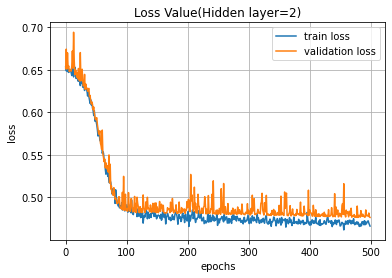

In [40]:
plt.title('Loss Value(Hidden layer=2)')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

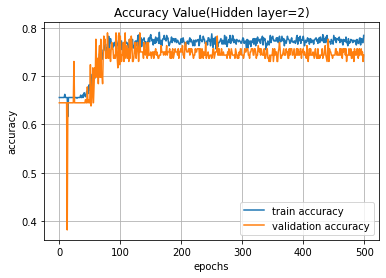

In [41]:
plt.title('Accuracy Value(Hidden layer=2)')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [42]:
(loss, acc) = model.evaluate(x_train_data, t_train_data)

24/24 [==============================] - 0s 684us/step - loss: 0.4671 - accuracy: 0.7708


In [43]:
print("Evaluated Model Loss: %f / Accuracy: %f" % (loss, acc))

Evaluated Model Loss: 0.467093 / Accuracy: 0.770751
